# Assignment 2 - Classification of Sentences from Medical Publications

**Submission deadline: Friday 23 April, 11pm** 

**Penalty for late submission: 2 marks per day late or part thereof**

**Assessment marks: 20 marks (20% of the total unit assessment)**

In this assignment you will implement several systems that classify sentences from the abstracts of medical publications.

The data is from a Kaggle in Class competition what we organised in 2012, as part of the Australasian Language Technology Association series of shared tasks: 

* [ALTA-NICTA Challenge](https://www.kaggle.com/c/alta-nicta-challenge2)

For more information about the original shared task, follow these links:

* [Description of the 2012 ALTA-NICTA Challenge](http://www.alta.asn.au/events/sharedtask2012/description.html).
* [Kaggle-in-class Competition Page](https://www.kaggle.com/c/alta-nicta-challenge2).


## Data
The data are stored in this CSV file:

* [train.csv](train.csv)

Below you can see the first lines of the file:

```
Prediction,Label,Document,Sentence,Text
0,background,10072623,1,OBJECTIVES
0,intervention,10072623,1,OBJECTIVES
0,population,10072623,1,OBJECTIVES
0,outcome,10072623,1,OBJECTIVES
1,other,10072623,1,OBJECTIVES
0,"study design",10072623,1,OBJECTIVES
1,background,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
1,intervention,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
1,population,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,outcome,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,other,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,"study design",10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
```

Each line represents the label of one sentence. The file is in CSV format (comma separated values), and the values correspond to the following:

1. `Prediction`: 1 if the text has the label, 0 if it doesn't.
2. `Label`: One of `background`, `intervention`, `population`, `outcome`, `study design`, `other` (see below).
3. `Document`: Document ID. A document may contain several sentences.
4. `Sentence`: Sentence ID. 1 for the first sentence, 2 for the second sentence, and so on.
5. `Text`: The contents of the sentence.

A sentence may have 1 or more of 6 possible labels, and consequently the same sentence appears in multiple lines, one per label. The possible labels are: 

* `background`: the sentence describes background information.
* `intervention`: the sentence describes a medical intervention.
* `population`: the sentence describes characteristics of the population being described in the publication. For example, the age of the subjects of study, their country of origin, etc.
* `outcome`: the sentence describes the outcome of the study, e.g. whether the intervention was effective.
* `study design`: the sentence contains details of the study design.
* `other`: anything else. For example, in the sample above, the text "OBJECTIVES" was a section heading. 

The first number of each line indicates whether the label is assigned to the sentence (1) or not (0).

For example, the first sentence of document with ID 10072623 has the label "other", but the second sentence has the labels "background", "intervention", and "population".

**Your task will be to write code that predicts the label or labels of the input sentences.** This is what is called "multi-label classification".

**If you haven't completed the exercises of week 6 practical, complete them before attempting this assignment. They are designed to help with the assignment.**

The following code uses the `pandas` library (https://pandas.pydata.org/) to read the data, and `matplotlib` (https://matplotlib.org/) to plot the distribution of labels.

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_pd = pd.read_csv('https://raw.githubusercontent.com/COMP3220/2021S1/main/assignments/a2/train.csv')
train_pd.head(10)

,Prediction,Label,Document,Sentence,Text
0,0,background,10072623,1,OBJECTIVES
1,0,intervention,10072623,1,OBJECTIVES
2,0,population,10072623,1,OBJECTIVES
3,0,outcome,10072623,1,OBJECTIVES
4,1,other,10072623,1,OBJECTIVES
5,0,study design,10072623,1,OBJECTIVES
6,1,background,10072623,2,We wanted to evaluate the urodynamic changes o...
7,1,intervention,10072623,2,We wanted to evaluate the urodynamic changes o...
8,1,population,10072623,2,We wanted to evaluate the urodynamic changes o...
9,0,outcome,10072623,2,We wanted to evaluate the urodynamic changes o...


To plot the data we will convert the data from a "long" format to a "wide" format that can be processed more easily. In this wide format, there is one column for each label. The code to do this uses panda's `pivot_table`:

In [3]:
train_pd = train_pd.pivot_table(index=['Document','Sentence','Text'], columns=['Label'], values='Prediction').reset_index() 
train_pd.head()

Label,Document,Sentence,Text,background,intervention,other,outcome,population,study design
0,145506,1,The rare liquor leakage syndrome with cranial ...,1,0,0,0,0,0
1,145506,2,This does not occur after a suboccipital punct...,1,0,0,0,0,0
2,145506,3,A report is given on three cases with differen...,0,0,0,0,1,0
3,145506,4,The prognosis of the eye-muscle paresis is good.,0,0,0,1,0,0
4,145506,5,Restitutio ad integrum resulted.,0,0,0,1,0,0


Let's plot the distribution of labels:

In [4]:
labels = ['background', 'intervention', 'population', 'outcome', 'study design', 'other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[2031, 565, 662, 3564, 193, 2712]


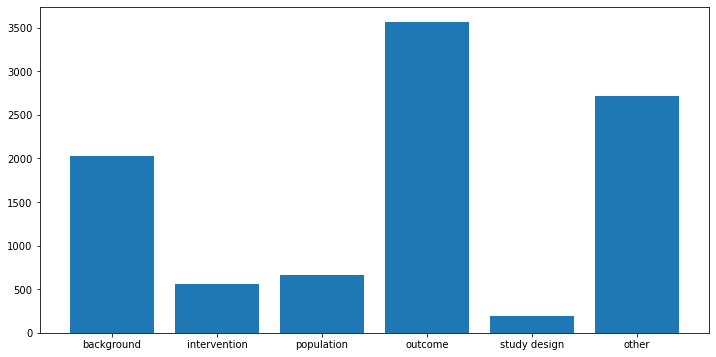

In [5]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

We can see that the training data contain 800 documents:

In [6]:
documents = list(set(train_pd['Document']))
print(len(documents))

800


# Task 1 (5 marks): Data partition
Based on the list of documents (for example, use the variable `documents` above), partition the data into three sets: a training set, a devtest set, and a test set, so that:

* The training set uses 600 documents.
* The dev-test set uses 100 documents.
* The test set uses 100 documents.

Make sure that the partition is a **random partition**. That is, you need to shuffle the list of documents before you make the partitions. Also, to facilitate reproducibility, execute the following cell that sets a specific random seed:



In [7]:
import random
random.seed(1234)

After writing the code, answer the following questions using additional text cells in this Jupyter notebook:

1. (1 mark) Why do we want to use document IDs, and not individual sentences, to make the partition?
2. (1 mark) Plot the distribution of labels in each partition and comment on whether these distributions are similar.

The remaining 3 marks are for the code that performs the partition.

Hint: If you want to iterate through each row of the pandas data frame `train_pd`, you can use `itertuples`. Read, for example:

* https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/
* https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

Here is some code that shows the output of `itertuples`  over the first three rows:

```
train_pd_tuples = [r for r in train_pd.itertuples(index=False, name=None)]
train_pd_tuples[:3]
```

In [114]:
# Write your solution here. Don't forget to add text cells where you answer the questions being asked in this task.
df = pd.DataFrame(train_pd, columns=['Label', 'Document', 'Sentence', 'Text', 'background', 'intervention', 'other', 'outcome', 'population', 'study design'])

In [115]:
random.shuffle(documents)

In [116]:
train_doc = documents[:600]
devtest_doc = documents[600:700]
test_doc = documents[700:]

In [150]:
train_set = [row for row in df.itertuples(index = True, name='Pandas')  if(getattr(row, "Document") in train_doc)]
df_train = pd.DataFrame(train_set, columns=[" ",'Label', 'Document', 'Sentence', 'Text', 'background', 'intervention', 'other', 'outcome', 'population', 'study design'])

In [179]:
devtest_set = [row for row in df.itertuples(index = True, name='Pandas') if(getattr(row, "Document") in devtest_doc)]
df_devtest = pd.DataFrame(devtest_set, columns=[" ",'Label', 'Document', 'Sentence', 'Text', 'background', 'intervention', 'other', 'outcome', 'population', 'study design'])

In [152]:
test_set = [row for row in df.itertuples(index = True, name='Pandas') if(getattr(row, "Document") in test_doc)]
df_test = pd.DataFrame(test_set, columns=[" ",'Label', 'Document', 'Sentence', 'Text', 'background', 'intervention', 'other', 'outcome', 'population', 'study design'])

In [163]:
train_label_counts = []
for l in labels:
    counts = df_train[l].sum()
    train_label_counts.append(counts)
print(train_label_counts)

[1554, 450, 496, 2690, 144, 2072]


In [162]:
devtest_label_counts = []
for l in labels:
    counts = df_devtest[l].sum()
    devtest_label_counts.append(counts)
print(devtest_label_counts)

[234, 50, 90, 429, 29, 357]


In [164]:
test_label_counts = []
for l in labels:
    counts = df_test[l].sum()
    test_label_counts.append(counts)
print(test_label_counts)

[243, 65, 76, 445, 20, 283]


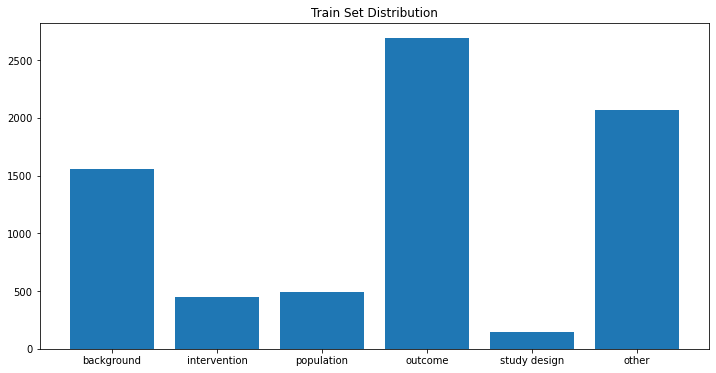

In [165]:
plt.figure(figsize=(12,6))
plt.bar(range(6), train_label_counts)
plt.xticks(range(6), labels)
plt.title("Train Set Distribution")
plt.show()

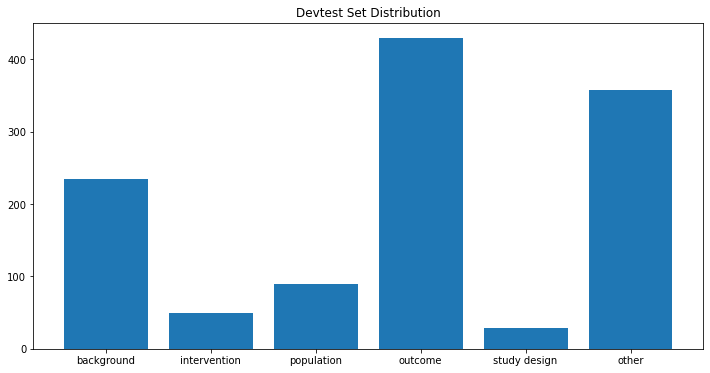

In [166]:
plt.figure(figsize=(12,6))
plt.bar(range(6), devtest_label_counts)
plt.xticks(range(6), labels)
plt.title("Devtest Set Distribution")
plt.show()

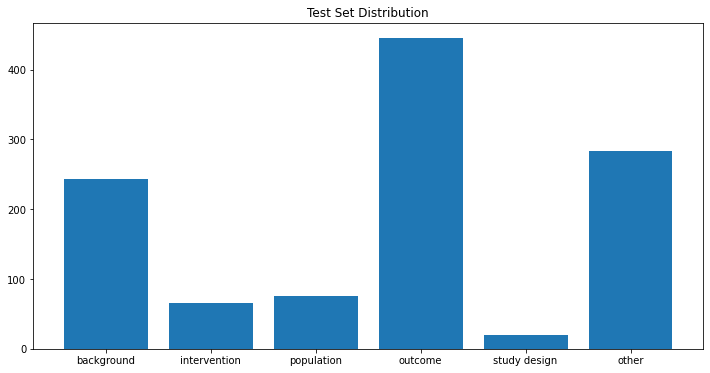

In [167]:
plt.figure(figsize=(12,6))
plt.bar(range(6), test_label_counts)
plt.xticks(range(6), labels)
plt.title("Test Set Distribution")
plt.show()

# Task 2 (5 marks): Naive Bayes

Using scikit-learn, train 6 separate Naive Bayes classifiers (hint: use `MultinomialNB` for each of the classifiers). Each classifier must be trained with the part of the training data that corresponds with one of the possible labels. For example:

1. Train a Naive Bayes classifier using only the data that corresponds with the "background" label.
2. Train a **different** Naive Bayes classifier using only the data that corresponds with the "intervention" label.
3. And so on with the other labels, for a total of 6 different classifiers.

Make sure that you train only with the training data. For each classifier, report the accuracy on the training data, devtest data, and test data.

Use tf.idf of the top 10000 words as the feature extractor (hint: use scikit-learn's `TfidfVectorizer`, and use the option `max_features=10000`). You do not need to use stop words or stemming for this task.

Report the evaluation of your classifers and answer the following questions.

1. (1 mark) What evaluation metric did you choose and why?
2. (1 mark) Comment on whether any of the 6 classifiers is overfitting and explain how you determined whether they are overfitting.

The remaining 3 marks will be allocated to the code that implements and evaluates the Naive Bayes classifiers.

In [169]:
# Write your solution here. Don't forget to add text cells where you answer the questions being asked in this task.


In [235]:
def labeltext(label, data):
    test = [row for row in data.itertuples(index = True,        name='Pandas') if(getattr(row, label) ==1 )]
    test1 = pd.DataFrame(test, columns=[" "," ",'Label', 'Document', 'Sentence', 'Text', 'background', 'intervention', 'other', 'outcome', 'population', 'study design'])
    result = list(test1['Text'])   
    return result

In [237]:
train_text_background = labeltext("background", df_train)
train_text_intervention = labeltext("intervention", df_train)
train_text_other = labeltext("other", df_train)
train_text_outcome = labeltext("outcome", df_train)
train_text_population = labeltext("population", df_train)
#train_text_study_design = labeltext("study design", df_train)


In [284]:
labels_background = df_train.drop(labels='background', axis=1).to_numpy()
labels_intervention = df_train.drop(labels='intervention', axis=1).to_numpy()
labels_other = df_train.drop(labels='other', axis=1).to_numpy()
labels_outcome = df_train.drop(labels='outcome', axis=1).to_numpy()
labels_population = df_train.drop(labels='population', axis=1).to_numpy()
labels_study_design = df_train.drop(labels='study design', axis=1).to_numpy()

In [264]:
import numpy as np

In [317]:
test = [row for row in df_train.itertuples(index = True,   name='Pandas') if(getattr(row, "background") ==1 )]
test1 = pd.DataFrame(test, columns=['','','Label', 'Document','Sentence', 'Text', 'background','intervention', 'other', 'outcome','population', 'study design'])
Array1 = list(test1['background']) 
   

In [238]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input = 'contents', max_features = 10000)

In [272]:
train_tfidf_background = tfidf.fit_transform(train_text_background).toarray()

In [318]:
from sklearn.naive_bayes import MultinomialNB
Classifier = MultinomialNB()
Classifier.fit(train_tfidf_background, Array1)

MultinomialNB()

# Task 3 (5 marks): A Simple Neural Network
Implement a simple TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept tf.idf information.
2. An output layer that has 6 cells. Each cell will classify the sentence into one of the 6 possible sentence types.

As in the previous task, train the classifier with the tf.idf information of the input sentences. (Hint: sklearn produces sparse tf.idf matrices but TensorFlow models only accept dense matrices so you need to convert the tf_idf matrix of the training data into a dense Numpy array. As we have seen in the lectures, you can use `toarray` to convert the sparse matrix into a dense Numpy array.)

Train and test your system and report on the results. Include text cells in this Jupyter notebook where you must answer the following questions (2 marks):

1. How many parameters does the model have?
2. What is the optimal number of epochs? How do you know this is the optimal number of epochs?
3. Does your system overfit when training with the optimal number of epochs? How can you determine this?
4. How do the results compare against the Naive Bayes implementation of the previous task?

The remaining 3 marks will be allocated to the code.

In [ ]:
# Write your solution here. Don't forget to add text cells where you answer the questions being asked in this task.

# Task 4 (5 marks): A Recurrent Neural Network
Implement a more complex neural network what is composed of the following sequence of layers:

* An embedding layer that generates **embedding vectors with 40 dimensions**. Tensorflow requires that this input list be of fixed length. You need to choose the appropriate length by examining the distribution of lengths of the input sentences. (Hint: to set the fixed input length, use TensorFlow's `pad_sequences`). Also, restrict the vocabulary to the **10000 most frequent words** of the training set (Hint: use [Keras' tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) with the option `num_words=10000`)
* A LSTM layer that generates an **output of 50 dimensions**.
* The final output layer composed of the **6 binary classifiers**.

Train the system on the training data and evaluate the results. Compare with the previous systems and conduct the same kind of analysis that you did in the previous tasks.

The marks for this task will be allocated as follows:

* 3 marks for the code.
* 2 marks for the explanations and analysis.

In [ ]:
# Write your solution here. Don't forget to add text cells where you answer the questions being asked in this task.

# Submission of results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this [useful guide to the MarkDown notation](http://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-integrity).
